In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.signal import convolve
from scipy import ndimage
import getBayer
% matplotlib inline
import io
import time
import copy
from numpy.lib.stride_tricks import as_strided

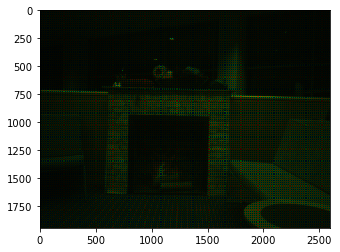

In [8]:
res = getBayer.getBayer('pic2.jpeg')
testIm = copy.deepcopy(res)
# testIm = scipy.misc.imresize(testIm, .25)
plt.imshow(testIm)

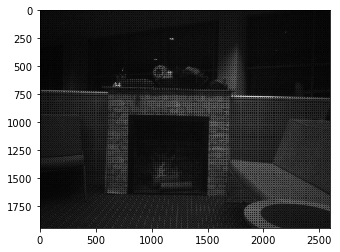

In [11]:
flatIm = testIm[:,:,0]+testIm[:,:,1]+testIm[:,:,2]
plt.imshow(flatIm, cmap = 'gray')

In [5]:
m = testIm.shape[0]
n = testIm.shape[1]
k = 20 # defining size of training block

